In [ ]:
from google.colab import files

uploaded = files.upload()

Saving translated_labeled_tweets.csv to translated_labeled_tweets (1).csv


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('translated_labeled_tweets.csv')
df.columns

Index(['Unnamed: 0', 'tweet_id', 'tweet.user.screen_name', 'tweet.created_at',
       'tweet.user.followers_count', 'tweet.user.following_count',
       'tweet.user.verified', 'tweet.user.created_at', 'retweeters',
       'engagement', 'clean_text', 'lexical_diversity', 'entropy',
       'misinformation_label', 'affiliated'],
      dtype='object')

In [ ]:
party_counts = df.groupby('affiliated')['misinformation_label'].value_counts()
print(party_counts)

affiliated   misinformation_label
center-left  valid                   2397
             invalid                  148
             misleading                69
left         valid                   1166
             invalid                  209
             misleading               138
right        valid                   2525
             invalid                  237
             misleading               159
Name: count, dtype: int64


In [ ]:
username_counts = df.groupby('tweet.user.screen_name')['misinformation_label'].value_counts()
print(username_counts)

tweet.user.screen_name  misinformation_label
AlexandarMKD            valid                   286
                        invalid                  58
                        misleading               34
GruevskiNikola          valid                   301
                        invalid                  41
                        misleading               38
MickoskiHM              valid                   354
                        invalid                  27
                        misleading               12
SDSMakedonija           valid                   168
                        invalid                  18
                        misleading               11
SPendarovski            valid                   560
                        invalid                  37
                        misleading               20
Sekerinska              valid                   565
                        invalid                  19
                        misleading               16
TimcoMucunski      

In [ ]:
G = nx.Graph()

original_users = df['tweet.user.screen_name'].unique().tolist()

for index, row in df.iterrows():
  G.add_node(row['tweet.user.screen_name'],afiliated=row['affiliated'], misinfromation=['misinformation_label'])

df['retweeters'] = df['retweeters'].fillna('None')

for index, row in df.iterrows():
    if row['tweet.user.screen_name'] in original_users:
        G.add_node(row['tweet.user.screen_name'],
                   affiliated=row['affiliated'],
                   misinformation=row['misinformation_label'])

        if row['retweeters'] != 'None':
            retweeters = row['retweeters'].split(',')
            for retweeter in retweeters:
                retweeter = retweeter.strip()

                if retweeter in original_users:
                    G.add_node(retweeter)
                    if G.has_edge(retweeter, row['tweet.user.screen_name']):
                        G[retweeter][row['tweet.user.screen_name']]['weight'] += 1
                    else:
                        G.add_edge(retweeter, row['tweet.user.screen_name'], weight=1)

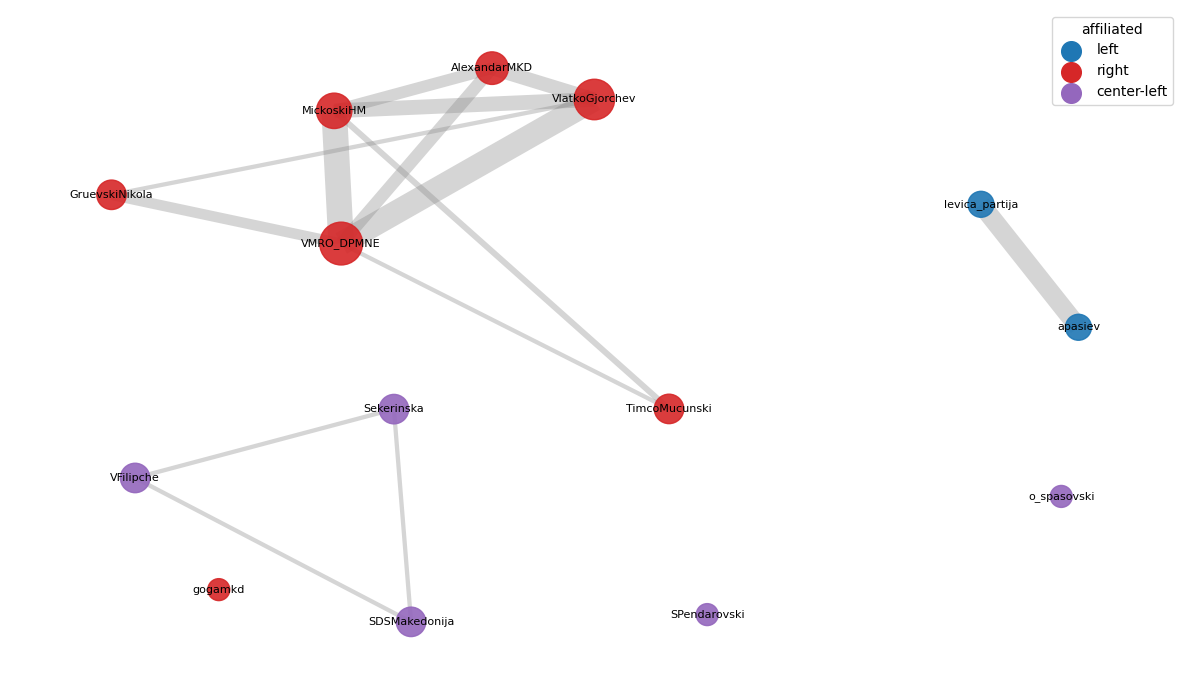

In [ ]:
side_colour={"left":"#1f77b4","right":"#d62728","center-left":"#9467bd"}
pos=nx.spring_layout(G,weight=None,k=1.5,seed=42)
cols=[side_colour.get(G.nodes[n].get("affiliated"),"#cccccc") for n in G]
sizes=[250+100*G.degree(n) for n in G]
ews=[1+3*np.log1p(d["weight"]) for *_,d in G.edges(data=True)]

G.remove_edges_from(nx.selfloop_edges(G))

plt.figure(figsize=(12,7))
nx.draw_networkx_nodes(G,pos,node_color=cols,node_size=sizes,alpha=.9)
nx.draw_networkx_edges(G,pos,width=ews,alpha=.35,edge_color="#888888")
nx.draw_networkx_labels(G,pos,font_size=8)
for s,c in side_colour.items(): plt.scatter([],[],c=c,s=200,label=s)
plt.legend(title="affiliated",bbox_to_anchor=(1,1))
plt.axis("off"); plt.tight_layout(); plt.show()

In [ ]:
w = nx.get_edge_attributes(G,"weight")
total_edges      = G.number_of_edges()
total_interacts  = sum(w.values())
density          = nx.density(G)

In [ ]:
total_edges, total_interacts, density

(14, 547, 0.15384615384615385)

In [ ]:
G = nx.Graph()

original_users = df['tweet.user.screen_name'].unique().tolist()

for index, row in df.iterrows():
  G.add_node(row['tweet.user.screen_name'],afiliated=row['affiliated'], misinfromation=['misinformation_label'])

df['retweeters'] = df['retweeters'].fillna('None')

for index, row in df.iterrows():
    if row['tweet.user.screen_name'] in original_users and (row['misinformation_label'] == 'invalid' or row['misinformation_label'] =='misleading'):
        G.add_node(row['tweet.user.screen_name'],
                   affiliated=row['affiliated'],
                   misinformation=row['misinformation_label'])

        if row['retweeters'] != 'None':
            retweeters = row['retweeters'].split(',')
            for retweeter in retweeters:
                retweeter = retweeter.strip()

                if retweeter in original_users:
                    G.add_node(retweeter)
                    if G.has_edge(retweeter, row['tweet.user.screen_name']):
                        G[retweeter][row['tweet.user.screen_name']]['weight'] += 1
                    else:
                        G.add_edge(retweeter, row['tweet.user.screen_name'], weight=1)

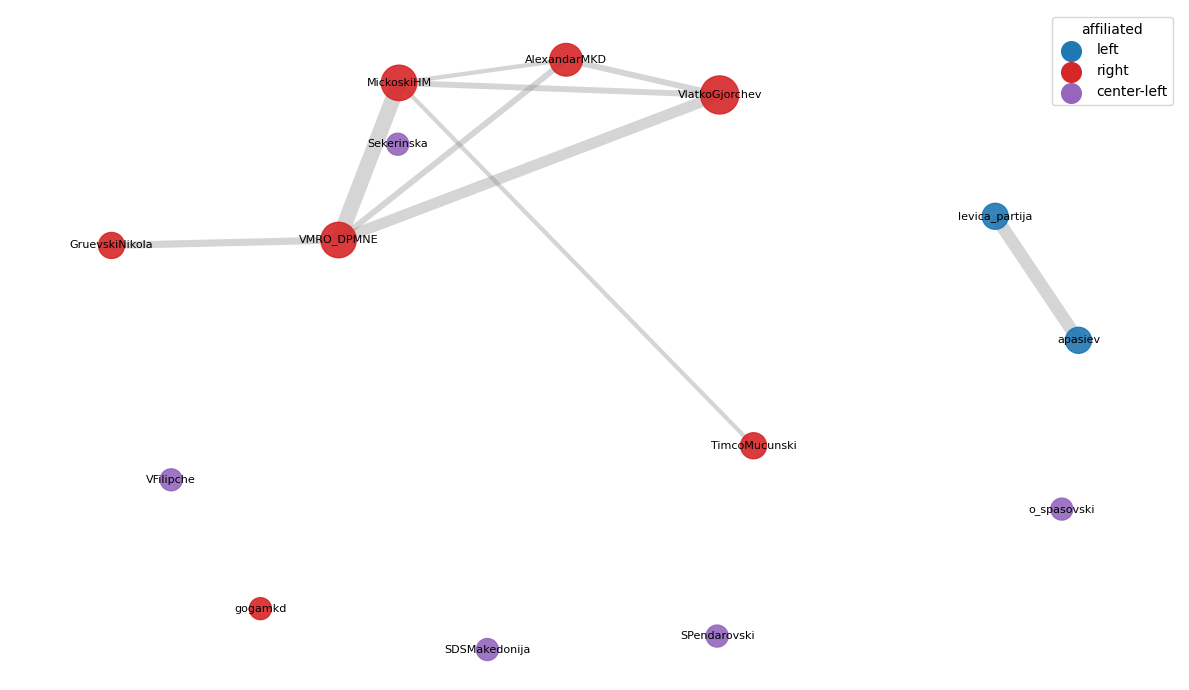

In [ ]:
side_colour={"left":"#1f77b4","right":"#d62728","center-left":"#9467bd"}
pos=nx.spring_layout(G,weight=None,k=1.5,seed=42)
cols=[side_colour.get(G.nodes[n].get("affiliated"),"#cccccc") for n in G]
sizes=[250+100*G.degree(n) for n in G]
ews=[1+3*np.log1p(d["weight"]) for *_,d in G.edges(data=True)]

G.remove_edges_from(nx.selfloop_edges(G))

plt.figure(figsize=(12,7))
nx.draw_networkx_nodes(G,pos,node_color=cols,node_size=sizes,alpha=.9)
nx.draw_networkx_edges(G,pos,width=ews,alpha=.35,edge_color="#888888")
nx.draw_networkx_labels(G,pos,font_size=8)
for s,c in side_colour.items(): plt.scatter([],[],c=c,s=200,label=s)
plt.legend(title="affiliated",bbox_to_anchor=(1,1))
plt.axis("off"); plt.tight_layout(); plt.show()

In [ ]:
w = nx.get_edge_attributes(G,"weight")
total_edges      = G.number_of_edges()
total_interacts  = sum(w.values())
density          = nx.density(G)

In [ ]:
total_edges, total_interacts, density

(9, 58, 0.0989010989010989)

In [ ]:
import pandas as pd, networkx as nx, matplotlib.pyplot as plt, seaborn as sns
from community import community_louvain

G = nx.DiGraph()
df['retweeters'] = df['retweeters'].fillna('None')

for _, r in df[df['misinformation_label'] == 'invalid'].iterrows():
    u = r['tweet.user.screen_name']
    G.add_node(u, affiliated=r['affiliated'])
    if r['retweeters'] != 'None':
        for v in map(str.strip, r['retweeters'].split(',')):
            G.add_node(v)
            w = G.get_edge_data(v, u, {'weight': 0})['weight'] + 1
            G.add_edge(v, u, weight=w)

print(f"{G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

indeg = nx.in_degree_centrality(G)
print(sorted(indeg.items(), key=lambda x: x[1], reverse=True)[:15])

1267 nodes, 1830 edges
[('apasiev', 0.4304897314375987), ('GruevskiNikola', 0.1627172195892575), ('AlexandarMKD', 0.13744075829383887), ('levica_partija', 0.08925750394944708), ('TimcoMucunski', 0.08056872037914692), ('MickoskiHM', 0.07819905213270142), ('gogamkd', 0.07740916271721959), ('SPendarovski', 0.07661927330173776), ('o_spasovski', 0.06477093206951026), ('VMRO_DPMNE', 0.0631911532385466), ('VFilipche', 0.05924170616113744), ('Sekerinska', 0.05608214849921011), ('SDSMakedonija', 0.05055292259083728), ('VlatkoGjorchev', 0.018957345971563982), ('Miner_Vo', 0.0)]


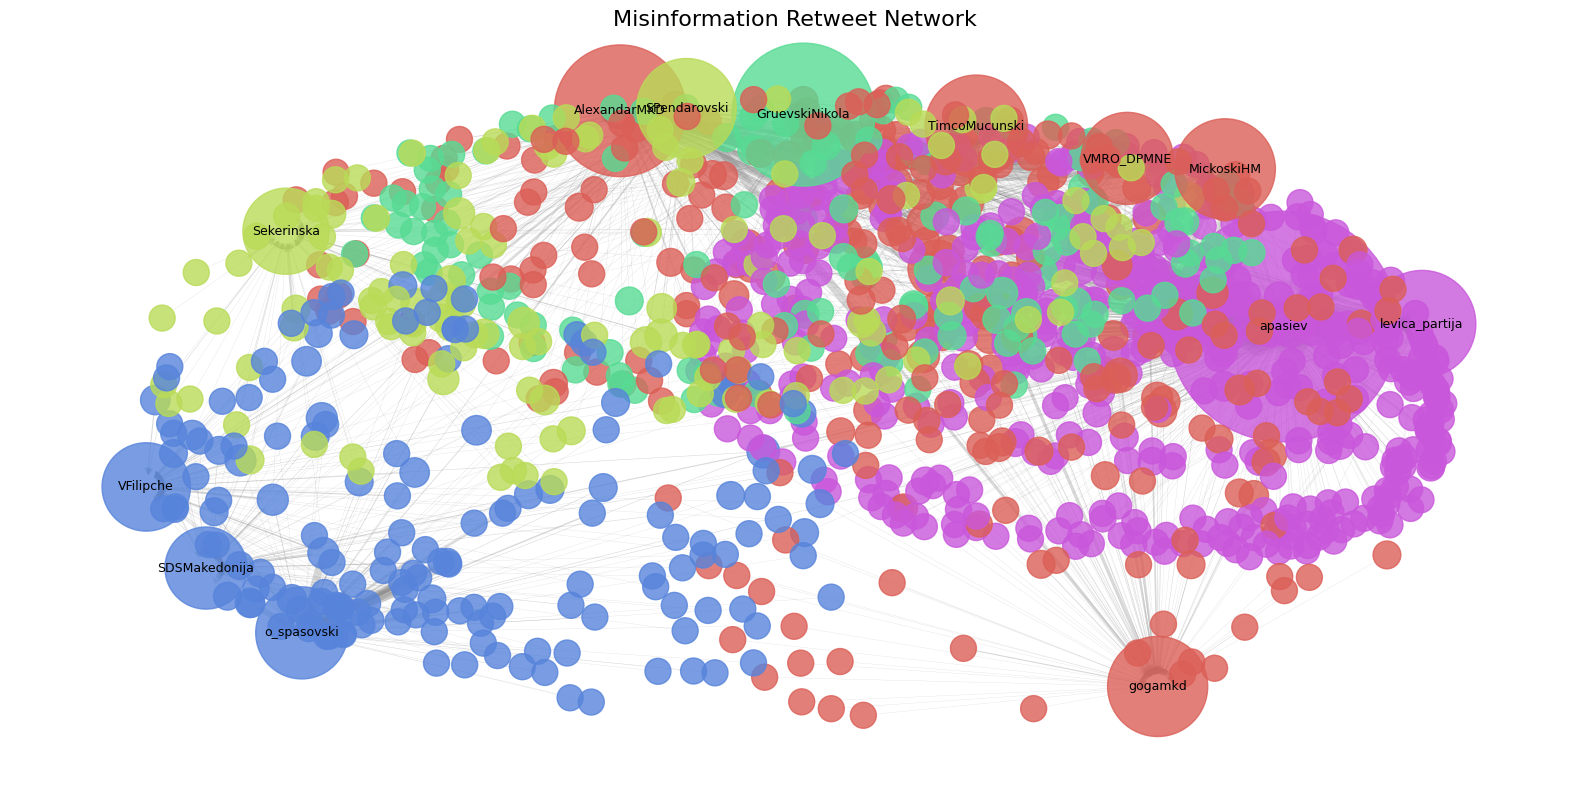

In [ ]:

part = community_louvain.best_partition(G.to_undirected())
nx.set_node_attributes(G, part, 'community')

pos = nx.spring_layout(G, k=.4, iterations=100, seed=42)
sizes = [300 + 50 * G.degree(n) for n in G]
palette = sns.color_palette('hls', len(set(part.values())))
colors = [palette[part[n]] for n in G]
weights = [.2 * G[u][v]['weight'] for u, v in G.edges()]

plt.figure(figsize=(16, 8))
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, alpha=.8)
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=.3, arrows=True)
labels = {n: n for n, c in indeg.items() if c > .05}
nx.draw_networkx_labels(G, pos, labels, font_size=9)
plt.title('Misinformation Retweet Network', fontsize=16)
plt.axis('off'); plt.tight_layout(); plt.show()
